In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# simulate dataset
np.random.seed(0)

# Generate random features and labels with noise
x = 2 * np.random.rand(100, 1) - 1  # Features between -1 and 1
y = (x[:, 0] > 0).astype(int).reshape(-1, 1)  # Labels: 1 if x > 0 else 0, reshaped to (100, 1)
# Add noise to the labels
noise = np.random.rand(100, 1) < 0.1  # 10% noise
y = np.logical_xor(y, noise).astype(int)

In [3]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
# Logistic regression model using gradient descent
def model(x, y, learning_rate, iterations):
    m = x.shape[0]
    n = x.shape[1]

    w = np.zeros((n, 1))
    B = 0
    cost_list = []

    for i in range(iterations):
        z = np.dot(x, w) + B
        A = sigmoid(z)
        
        # Avoid division by zero in cost calculation
        epsilon = 1e-5
        cost = -(1 / m) * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))
        
        dw = (1 / m) * np.dot(x.T, (A - y))
        dB = (1 / m) * np.sum(A - y)

        w = w - learning_rate * dw
        B = B - learning_rate * dB

        cost_list.append(cost)

        if i % (iterations // 10) == 0:
            print(f"Cost after iteration {i}: {cost}")

    return w, B, cost_list


In [5]:
# Parameters for gradient descent
iterations = 10000
learning_rate = 0.001

In [6]:
# Train the model
w, B, cost_list = model(x, y, learning_rate, iterations)

Cost after iteration 0: 0.6931271807599428
Cost after iteration 1000: 0.6508425985788299
Cost after iteration 2000: 0.6150227667338451
Cost after iteration 3000: 0.5845817164064687
Cost after iteration 4000: 0.5586004455015009
Cost after iteration 5000: 0.5363150863079478
Cost after iteration 6000: 0.5170976554016881
Cost after iteration 7000: 0.500434937685761
Cost after iteration 8000: 0.48590847585910013
Cost after iteration 9000: 0.4731769769066852


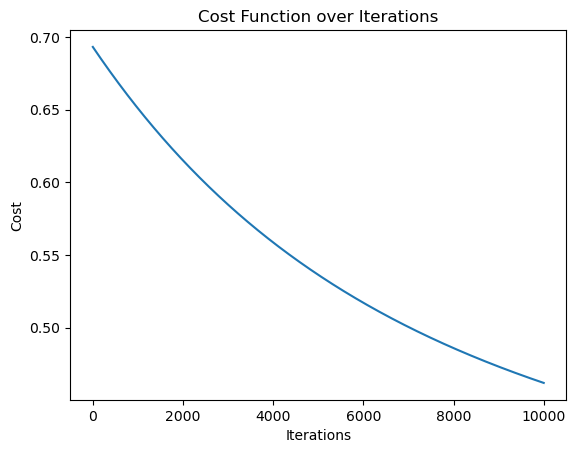

In [7]:
# Plot the cost function over iterations
plt.plot(range(iterations), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [8]:
#According to the above plot we can clearly see loss function value decreases and converging so that we can go to the next prediction steps 

In [9]:
# Predict function
def predict(x, w, B):
    z = np.dot(x, w) + B
    A = sigmoid(z)
    return (A >= 0.5).astype(int)


In [10]:
# Predicting on the training data
predictions = predict(x, w, B)

In [11]:
# Checking data and predictions
print("First 10 data points (features):\n", x[:10])
print("First 10 true labels:\n", y[:10])
print("First 10 predictions:\n", predictions[:10])

# Calculating accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Model accuracy: {accuracy}%")

First 10 data points (features):
 [[ 0.09762701]
 [ 0.43037873]
 [ 0.20552675]
 [ 0.08976637]
 [-0.1526904 ]
 [ 0.29178823]
 [-0.12482558]
 [ 0.783546  ]
 [ 0.92732552]
 [-0.23311696]]
First 10 true labels:
 [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
First 10 predictions:
 [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
Model accuracy: 93.0%


In [12]:
# further check the test accuracy using simulated test data
# Generate new test data with noise
x_test = 2 * np.random.rand(50, 1) - 1  # Test features between -1 and 1
y_test = (x_test[:, 0] > 0).astype(int).reshape(-1, 1)  # Test labels: 1 if x > 0 else 0
noise_test = np.random.rand(50, 1) < 0.1  # 10% noise
y_test = np.logical_xor(y_test, noise_test).astype(int)


In [13]:
# Predicting on the test data
test_predictions = predict(x_test, w, B)

# Calculating test accuracy
test_accuracy = np.mean(test_predictions == y_test) * 100
print(f"Test accuracy: {test_accuracy}%")

Test accuracy: 88.0%
